In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('houseprice.csv')

In [3]:
dataset.head()

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace,Price
0,1.982,1.0,3,2.00,133,0,14.2212
1,1.676,1.5,3,0.38,14,1,13.4865
2,1.694,2.0,3,0.96,15,1,11.8007
3,1.800,1.0,2,0.48,49,1,13.8297
4,2.088,1.0,3,1.84,29,1,12.9470


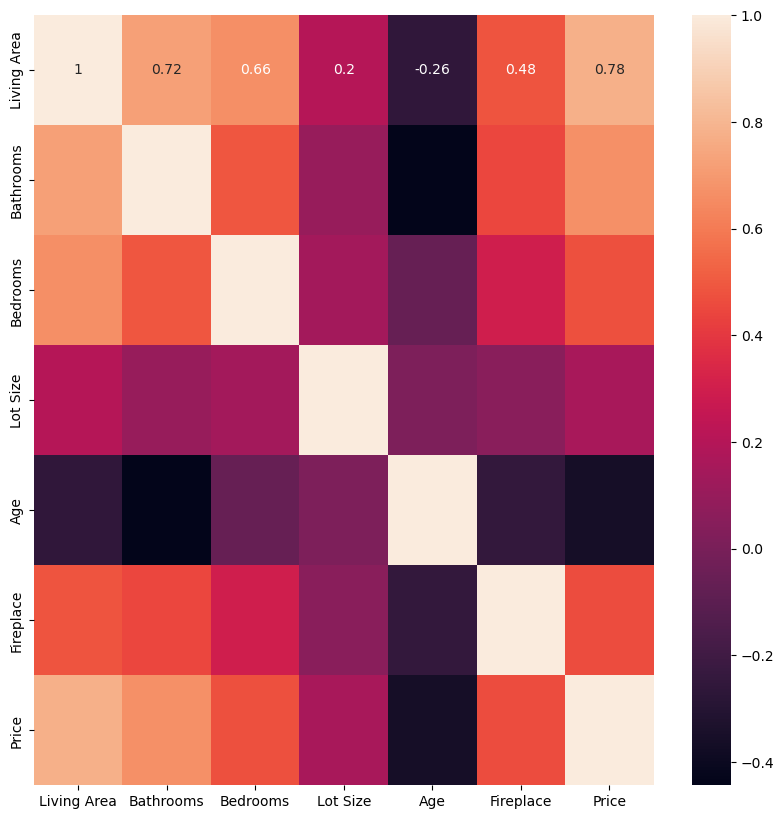

In [4]:
plt.figure(figsize = (10,10))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [5]:
x = dataset.iloc[:,:-1]
y = dataset["Price"]

In [6]:
sc = StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [7]:
x

,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace
0,0.272473,-1.431707,-0.244539,1.839752,3.008204,-1.207372
1,-0.204791,-0.652197,-0.244539,-0.243830,-0.403080,0.828245
2,-0.176717,0.127313,-0.244539,0.502144,-0.374414,0.828245
3,-0.011390,-1.431707,-1.578038,-0.115214,0.600239,0.828245
4,0.437800,-1.431707,-0.244539,1.633966,0.026914,0.828245
...,...,...,...,...,...,...
1042,-0.008271,0.127313,1.088961,0.515005,0.800903,0.828245
1043,2.232999,2.465842,1.088961,2.482833,-0.775741,0.828245
1044,-0.572877,0.127313,-1.578038,0.051987,1.087565,0.828245
1045,0.347338,0.906822,-0.244539,0.553590,-0.718409,0.828245


In [8]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [10]:
dataset.shape

(1047, 7)

In [13]:
lr = LinearRegression()

In [14]:
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
lr.score(x_test,y_test)

0.6477745304733609

In [33]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

17.38203863887801
2.8710764007435827
4.169177213657152


In [16]:
lr.coef_

array([ 4.1649387 ,  1.28672069, -0.40813207,  0.20617446, -0.64576019,
        0.41390807])

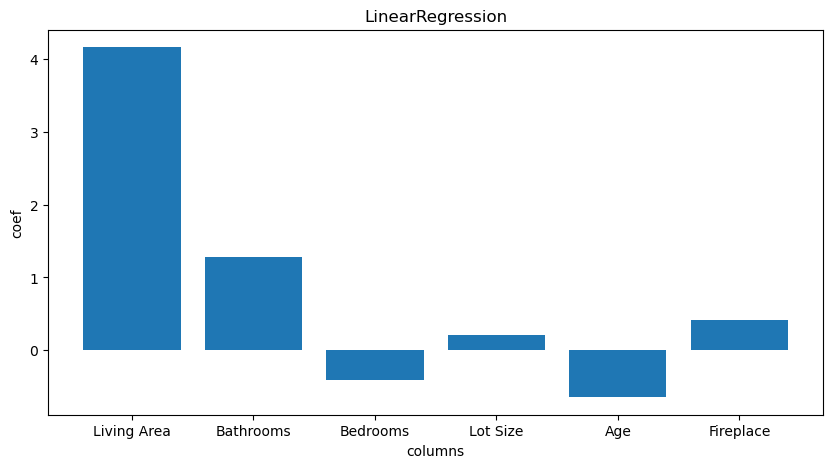

In [20]:
plt.figure(figsize=(10,5))
plt.bar(x.columns,lr.coef_)
plt.title('LinearRegression')
plt.xlabel('columns')
plt.ylabel('coef')
plt.show()

# Lasso

In [25]:
la = Lasso(alpha=0.5)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

62.99707957985695

In [34]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

18.2606383734442
2.9887326086885184
4.273246818689999


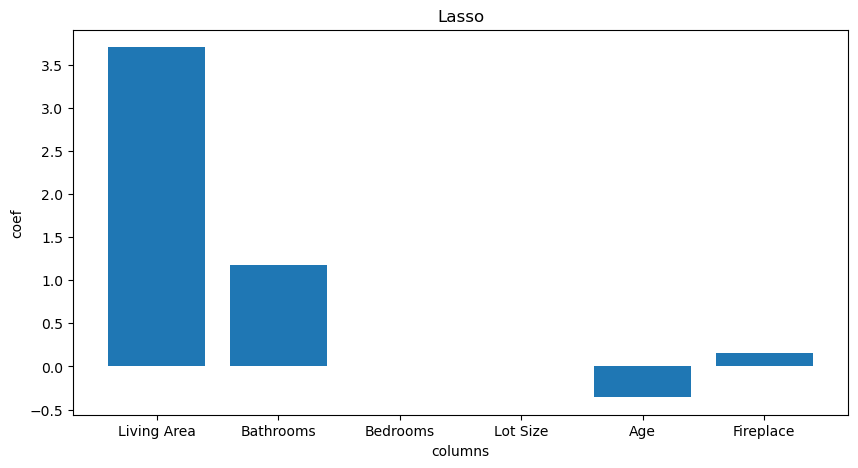

In [26]:
plt.figure(figsize=(10,5))
plt.bar(x.columns,la.coef_)
plt.title('Lasso')
plt.xlabel('columns')
plt.ylabel('coef')
plt.show()

# Ridge

In [27]:
ri = Ridge(alpha = 10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

64.71164219985903

In [35]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

17.41451575347284
2.875190956706045
4.173070302963136


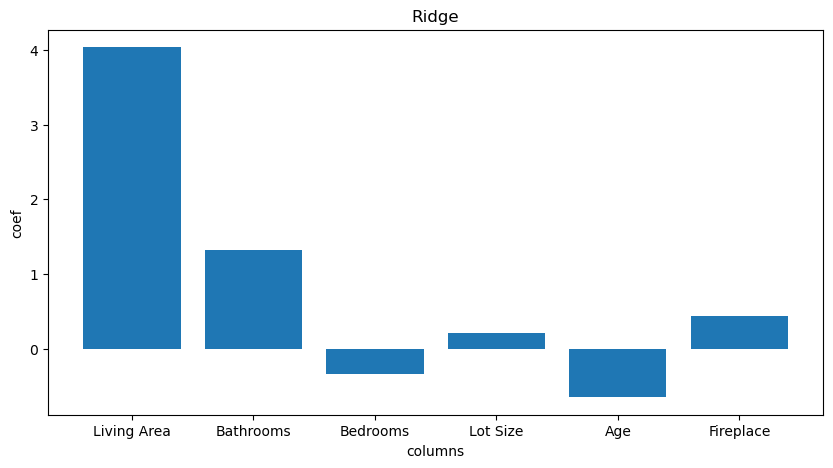

In [28]:
plt.figure(figsize=(10,5))
plt.bar(x.columns,ri.coef_)
plt.title('Ridge')
plt.xlabel('columns')
plt.ylabel('coef')
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [30]:
import numpy as np

In [36]:
df = pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})

In [37]:
df

,col_name,LinearRegression,Lasso,Ridge
0,Living Area,4.164939,3.702810,4.034984
1,Bathrooms,1.286721,1.171045,1.319945
2,Bedrooms,-0.408132,0.000000,-0.341988
3,Lot Size,0.206174,0.000000,0.214101
4,Age,-0.645760,-0.357469,-0.646817
5,Fireplace,0.413908,0.150484,0.435538
